In [11]:
# Matemáticas - estadísticas
import numpy as np
import math

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Interactividad
import ipywidgets

intensidad <div align='center'><font size=5>Series de Fourier</font></div amplitud de la isu interpretación>

## Interpretación
<center><font size = 4>General</font></center>
<br>
La serie de Fourier es la descomposición de una función $f(x)$ en varias funciones sinusoidales que sumadas y multiplicadas por unos coeficientes aproximen a $f(x)$, la ecuación que aproxima a $f(x)$ isu interpretación>

su interpretación es la intensidad de amplitud de la i-ésima onda senosoidal.
$$ \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n}{T}x\right) + b_n \sin\left(\frac{2\pi n}{T}x\right) \right]$$

<br>
<center><font size=4>Coeficientes de Fourier</font></center>

[comment]: <Término a0>
* $a_{0}$ equivale al sub-término previo a la sumatoria y su interpretación es el valor medio de la función.
  $$ a_0 = \frac{2}{T} \int_{T} f(x) \,dx $$

[comment]: <Término an>
* $a_{n}$ es el n-ésimo coeficiente de la n-ésima función trigonométrica ***coseno***, su interpretación es la intensidad de amplitud de la n-ésima onda senosoidal.
  $$ a_n = \frac{2}{T} \int_{T} f(x) \cos\left(\frac{2\pi n}{T}x\right) \,dx $$

[comment]: <Término bn>
* De forma análoga, $b_{n}$ es el n-ésimo coeficiente de la n-ésima función trigonométrica ***seno***, su interpretación es la intensidad de amplitud de la n-ésima onda senosoidal.
  $$ b_n = \frac{2}{T} \int_{T} f(x) \sin\left(\frac{2\pi n}{T}x\right) \,dx $$

<br>
<center><font size=4>Funciones trigonométricas</font></center>


[comment]: <x>
* En nuestro caso la adaptación de series de Fourier se determina en un contexto temporal, éste está definido en el eje x, de donde se establece su notación y aunque es más legible $t$, no se implementa esta notación para evitar confusiones con el periodo $T$.


### Ejemplo 1

Consideremos la siguiente función a trozos definida en el dominio de intervalo [-5,5] y de périodo $T = 10$.
$$ f(x) = \left\{
    \begin{array}{lcc} 
    3 & si & x > 0 \\
    0 & si & x < 0 
    \end{array} 
    \right.
$$

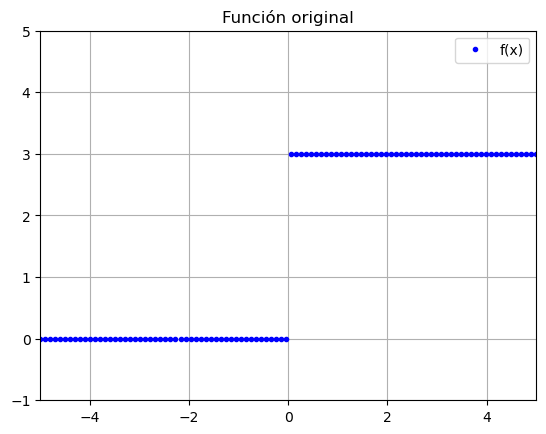

In [12]:
# Generando espacio de trabajo
t1 = np.linspace(-5,5,100) # variable independiente (temporal)
y1 = np.zeros(100) # imágen cuando x es menor a 0
y1[50:] = 3 # imágen cuando x es mayor o igual a 0

# Generar la gráfica
plt.plot(t1,y1,'b.')
plt.legend(['f(x)'])
plt.axis([-5,5,-1,5])
plt.grid(True)
plt.title("Función original")
plt.show()

#### Coeficientes de Fourier

En esta parte (como el título indica) es para determinar los coeficientes de Fourier que pertenecen a la función $f(x)$, es importante recordar que la integral de cero (0) es igual a cero (0) y por ende, al momento de integrar no se tomará en cuenta el intervalo de la función donde la imágen de la misma es cero(0).

<center><font size=4>Coeficiente $a_0$</font></center>

Implementando la fórmula para hallar el coeficiente $a_0$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ a_0 = \frac{1}{5} \int_{0}^{5} 3 \,dx = \frac{1}{5} (3x)\big|_{0}^{5} = \frac{15}{5} = 3 $$

<center><font size=4>Coeficiente $a_n$</font></center>

Implementando la fórmula para hallar el coeficiente $a_n$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ a_n = \frac{1}{5} \int_{0}^{5} 3 \cos\left(\frac{\pi n }{5}x\right)\,dx = \frac{1}{5} \left( \frac{15}{\pi n} \sin\left(\frac{\pi n }{5}x\right)\right)\big|_{0}^{5} $$

<center><font size=2>Evaluando senos y aplicando propiedades</font></center>

$$ a_n = \frac{1}{5} \left( \frac{15}{\pi n} \sin\left(\pi n\right) - \frac{15}{\pi n} \sin\left(0\right) \right) = \frac{1}{5} \left(0-0\right) = 0 $$

<center><font size=4>Coeficiente $b_n$</font></center>

Implementando la fórmula para hallar el coeficiente $a_n$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ b_n = \frac{1}{5} \int_{0}^{5} 3 \sin\left(\frac{\pi n }{5}x\right)\,dx = \frac{1}{5} \left( -\frac{15}{\pi n} \cos\left(\frac{\pi n }{5}x\right)\right)\big|_{0}^{5} $$
<center><font size=2>Evaluando</font></center>

$$ b_n = \frac{1}{5} \left( -\frac{15}{\pi n} \cos\left(\pi n\right) + \frac{15}{\pi n} \cos\left(0\right) \right) $$
<center><font size=2>Factorizando y reescribiendo</font></center>

$$ b_n = \frac{3}{\pi n} \left( (-1)\cos\left(\pi n\right) + \cos\left(0\right) \right) $$
<center><font size=2>Evaluando cosenos y aplicando propiedades</font></center>

$$ b_n = \frac{3}{\pi n} \left( (-1)(-1)^{n} + 1 \right) = \frac{3}{\pi n} \left( (-1)^{n+1} + 1 \right) $$


In [13]:
# Coeficientes implementados como una función anónima 
ex1_a0 = 3 # Menos este
ex1_bn = lambda n: ((3)/(np.pi*n))*(((-1)**(n+1)) +1)

#### Funciones trigonométricas

Las funciones trigonométricas que usamos para este ejercicio tanto en las integrales como en la sumatoria corresponden a las siguientes funciones reemplazando el périodo $T$ para cada una.

$$ \sin \left( \frac{2\pi n}{T}x\right) = \sin \left( \frac{2\pi n}{10}x\right) = \sin \left( \frac{\pi n}{5}x\right) $$
$$ \cos \left( \frac{2\pi n}{T}x\right) = \cos \left( \frac{2\pi n}{10}x\right) = \cos \left( \frac{\pi n}{5}x\right) $$

Recordemos que en este caso la variable independiente $x$ hace referencia a cada elemento dentro del arreglo $t$ e indica, en el contexto presente, cada segundo de nuestra variable temporal.

In [14]:
# Funciones trigonométricas implementadas como una función anónima
ex1_sen = lambda n: np.sin((np.pi*n*t1)/5)
ex1_cos = lambda n: np.cos((np.pi*n*t1)/5)

In [15]:
def example1(to=3):
    
    fourier = ex1_a0/2 + sum([ex1_bn(n)*ex1_sen(n)  for n in range(1,to+1)])
    
    plt.plot(t1,y1,'b.', t1,fourier,'r-')
    plt.legend(['f(x)',f'Grado {to}'])
    plt.axis([-5,5,-1,5])
    plt.grid(True)
    plt.title("Función original")
    plt.show()

ipywidgets.interact(example1, to=(3,11,2))

interactive(children=(IntSlider(value=3, description='to', max=11, min=3, step=2), Output()), _dom_classes=('w…

<function __main__.example1(to=3)>

### Ejemplo 2

Consideremos la siguiente función a trozos definida en el dominio de intervalo [-5,5] y de périodo $T = 10$.
$$ g(x) = \left\{
    \begin{array}{lcc} 
    0 & si & x < -3 \\
    1 & si & -3 < x < 3 \\
    0 & si & x > 3 
    \end{array} 
    \right.
$$

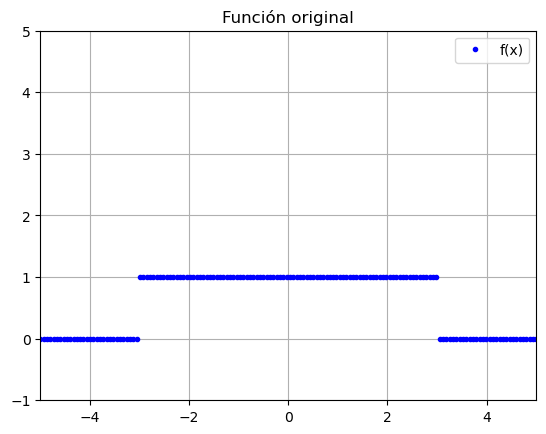

In [16]:
# Generando espacio de trabajo
t2 = np.linspace(-5,5,150) # variable independiente (temporal)
y2 = np.zeros(150) # array con 150 elementos iguales a cero
y2[30:120] = 1 # imágen cuando x está en el intervalo [-3, 3]

# Generar la gráfica
plt.plot(t2,y2,'b.')
plt.legend(['f(x)'])
plt.axis([-5,5,-1,5])
plt.grid(True)
plt.title("Función original")
plt.show()

#### Coeficientes de Fourier

En esta parte (como el título indica) es para determinar los coeficientes de Fourier que pertenecen a la función $g(x)$, es importante recordar que la integral de cero (0) es igual a cero (0) y por ende, al momento de integrar no se tomará en cuenta el intervalo de la función donde la imágen de la misma es cero(0).

<center><font size=4>Coeficiente $a_0$</font></center>

Implementando la fórmula para hallar el coeficiente $a_0$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ a_0 = \frac{1}{5} \int_{-3}^{3}  \,dx = \frac{1}{5} (x)\big|_{-3}^{3} = \frac{6}{5} $$

<center><font size=4>Coeficiente $a_n$</font></center>

Implementando la fórmula para hallar el coeficiente $a_n$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ a_n = \frac{1}{5} \int_{-3}^{3} \cos\left(\frac{\pi n }{5}x\right)\,dx = \frac{1}{5} \left( \frac{5}{\pi n} \sin\left(\frac{\pi n }{5}x\right)\right)\big|_{-3}^{3} $$

<center><font size=2>Evaluando senos y aplicando propiedades</font></center>

$$ a_n = \frac{1}{5} \left( \frac{5}{\pi n} \sin\left( \frac{3\pi n}{5} \right) - \frac{5}{\pi n} \sin\left( \frac{-3\pi n}{5} \right) \right) $$
<center><font size=2>Factorizando</font></center>

$$ a_n = \frac{1}{\pi n} \left( \sin\left( \frac{3\pi n}{5} \right) - \sin\left( \frac{-3\pi n}{5} \right) \right) $$
<center><font size=4>Coeficiente $b_n$</font></center>

Implementando la fórmula para hallar el coeficiente $a_n$ y reemplazando por los valores pertenecientes al ejemplo 1 obtenemos:
$$ b_n = \frac{1}{5} \int_{-3}^{3} \sin\left(\frac{\pi n }{5}x\right)\,dx = \frac{1}{5} \left( -\frac{5}{\pi n} \cos\left(\frac{\pi n }{5}x\right)\right)\big|_{-3}^{3} $$
<center><font size=2>Evaluando</font></center>

$$ b_n = \frac{1}{5} \left( -\frac{5}{\pi n} \cos\left( \frac{3\pi n}{5} \right) + \frac{5}{\pi n} \cos\left( \frac{-3\pi n}{5} \right) \right) $$
<center><font size=2>Factorizando y reescribiendo</font></center>

$$ b_n = \frac{1}{\pi n} \left( - \cos\left( \frac{3\pi n}{5} \right) + \cos\left( \frac{-3\pi n}{5} \right) \right) $$


In [17]:
ex2_a0 = 6/5
ex2_an = lambda n: (1/(np.pi*n))*(np.sin((3*np.pi*n)/5) - np.sin((-3*np.pi*n)/5))
ex2_bn = lambda n: (1/(np.pi*n))*(-np.cos((3*np.pi*n)/5) + np.cos((-3*np.pi*n)/5))

#### Funciones trigonométricas

Las funciones trigonométricas que usamos para este ejercicio tanto en las integrales como en la sumatoria corresponden a las siguientes funciones reemplazando el périodo $T$ para cada una.

$$ \sin \left( \frac{2\pi n}{T}x\right) = \sin \left( \frac{2\pi n}{10}x\right) = \sin \left( \frac{\pi n}{5}x\right) $$
$$ \cos \left( \frac{2\pi n}{T}x\right) = \cos \left( \frac{2\pi n}{10}x\right) = \cos \left( \frac{\pi n}{5}x\right) $$

Recordemos que en este caso la variable independiente $x$ hace referencia a cada elemento dentro del arreglo $t$ e indica, en el contexto presente, cada segundo de nuestra variable temporal.

In [18]:
ex2_sen = lambda n: np.sin((np.pi*n*t2)/5)
ex2_cos = lambda n: np.cos((np.pi*n*t2)/5)

In [19]:
def example2(to=2):

    fourier = ex2_a0/2 + sum([ex2_an(n)*ex2_cos(n) + ex2_bn(n)*ex2_sen(n)  for n in range(1,to+1)])
    
    plt.plot(t2,y2,'b.',t2,fourier,'r-')
    plt.legend(['g(x)',f'Grado {to}'])
    plt.axis([-5,5,-1,5])
    plt.grid(True)
    plt.title("Función original")
    plt.show()

ipywidgets.interact(example2, to=(2,11))

interactive(children=(IntSlider(value=2, description='to', max=11, min=2), Output()), _dom_classes=('widget-in…

<function __main__.example2(to=2)>